In [354]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras import callbacks
import tensorflow as tf
import numpy as np
import cv2
import os



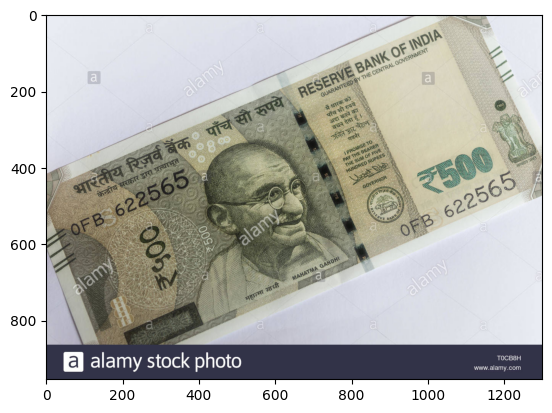

In [355]:
img=image.load_img("training/Money/500__0.jpg")
plt.imshow(img)

In [356]:
cv2.imread("training/10/10__0.jpg")

In [357]:
train=ImageDataGenerator(rescale=1/100)
validation=ImageDataGenerator(rescale=1/100)

In [358]:
train_path='training'
valid_path='validation'


train_dataset=train.flow_from_directory(directory=train_path,target_size=(200,200),batch_size=10,class_mode="binary")
validation_dataset=train.flow_from_directory(directory=valid_path,target_size=(200,200),batch_size=10,class_mode="binary")

Found 417 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [359]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                tf.keras.layers.MaxPool2D(2,2),
                                  
                                tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(512,activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')
                                ])

In [360]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [361]:


model_fit = model.fit(
    train_dataset,
    steps_per_epoch=5,  # Update this value based on your dataset
    epochs=50,
    validation_data=validation_dataset
)

Epoch 1/50
5/5 [==============================] - 9s 2s/step - loss: 2.2633 - accuracy: 0.6809 - val_loss: 0.9096 - val_accuracy: 0.5238
Epoch 2/50
5/5 [==============================] - 7s 2s/step - loss: 0.3663 - accuracy: 0.9400 - val_loss: 0.9250 - val_accuracy: 0.5238
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 0.0550 - accuracy: 1.0000 - val_loss: 3.1616 - val_accuracy: 0.5238
Epoch 4/50
5/5 [==============================] - 7s 2s/step - loss: 0.4063 - accuracy: 0.9000 - val_loss: 1.0068 - val_accuracy: 0.5238
Epoch 5/50
5/5 [==============================] - 7s 2s/step - loss: 0.1052 - accuracy: 0.9800 - val_loss: 3.9284 - val_accuracy: 0.5238
Epoch 6/50
5/5 [==============================] - 7s 2s/step - loss: 6.6953e-04 - accuracy: 1.0000 - val_loss: 4.4926 - val_accuracy: 0.5238
Epoch 7/50
5/5 [==============================] - 7s 2s/step - loss: 0.5811 - accuracy: 0.9000 - val_loss: 1.2874 - val_accuracy: 0.5238
Epoch 8/50
5/5 [=====================

In [ ]:
validation_dataset.class_indices

{'Background': 0, 'Money': 1}

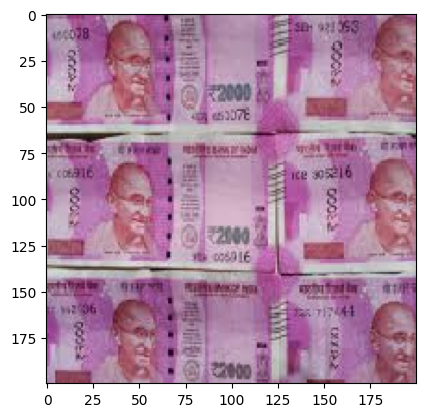

1/1 [==============================] - 0s 201ms/step
No


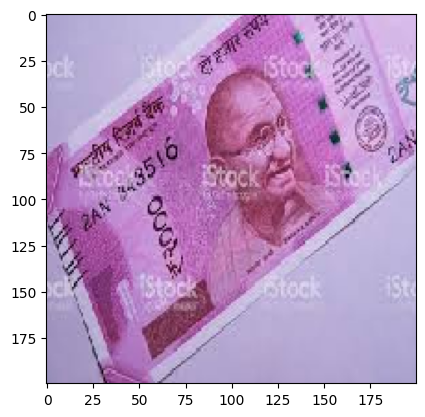

1/1 [==============================] - 0s 69ms/step
No


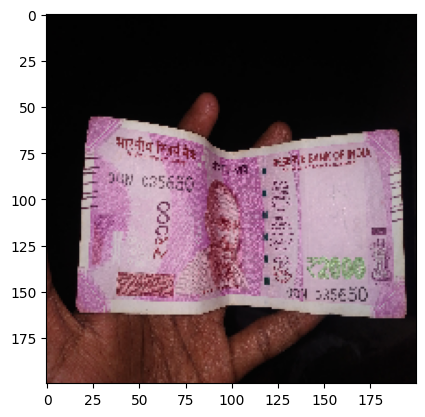

1/1 [==============================] - 0s 69ms/step
No


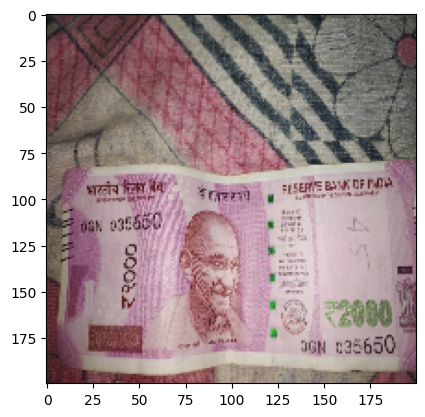

1/1 [==============================] - 0s 74ms/step
No


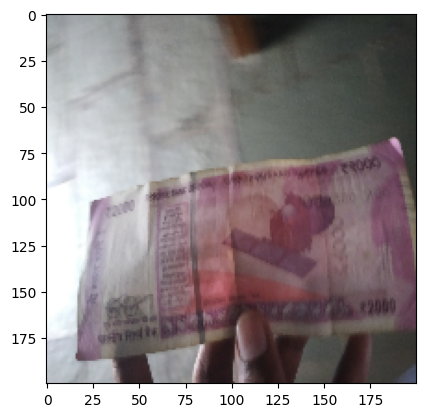

1/1 [==============================] - 0s 71ms/step
No


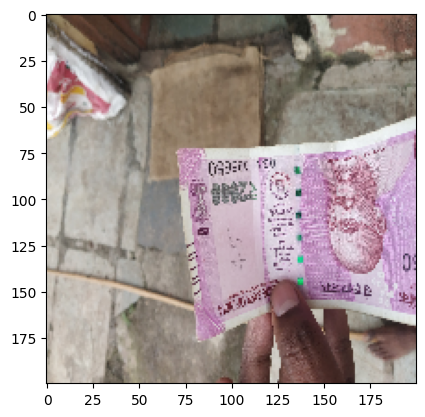

1/1 [==============================] - 0s 70ms/step
No


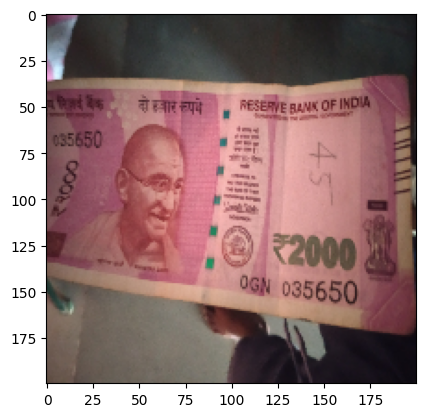

1/1 [==============================] - 0s 58ms/step
No


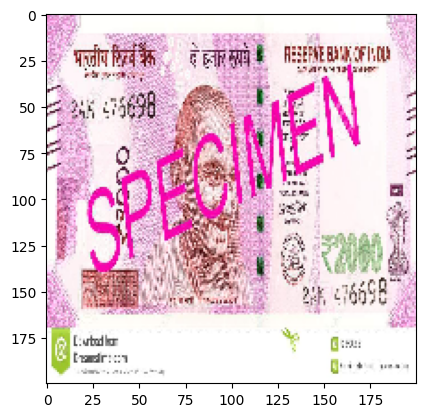

1/1 [==============================] - 0s 60ms/step
No


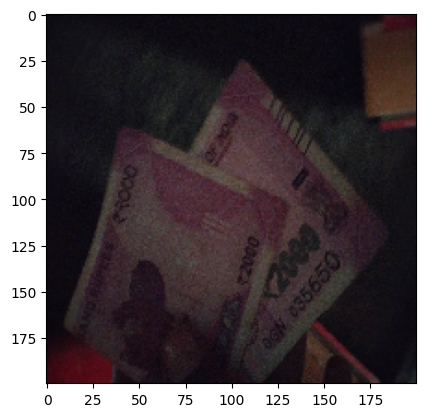

1/1 [==============================] - 0s 57ms/step
No


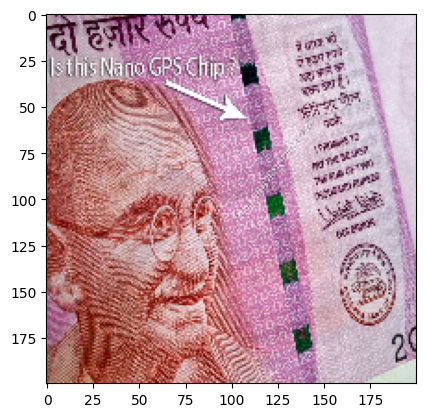

1/1 [==============================] - 0s 70ms/step
No


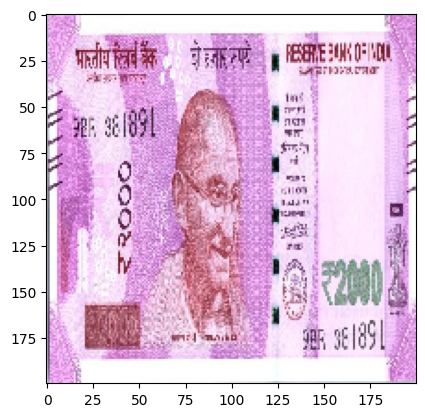

1/1 [==============================] - 0s 66ms/step
No


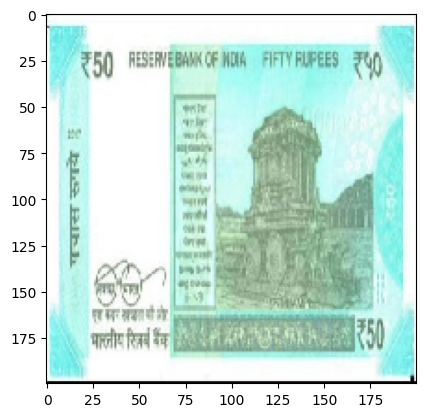

1/1 [==============================] - 0s 96ms/step
No


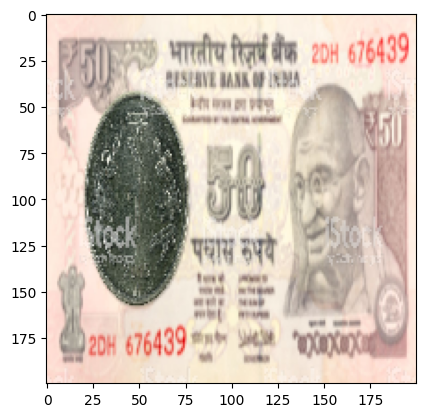

1/1 [==============================] - 0s 66ms/step
No


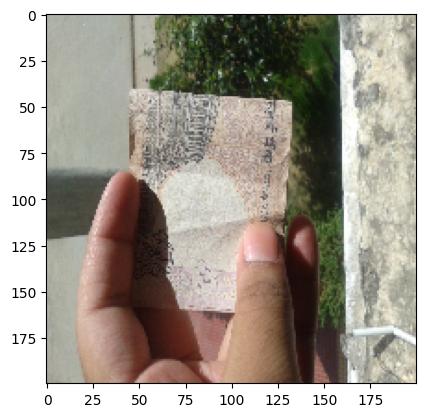

1/1 [==============================] - 0s 70ms/step
No


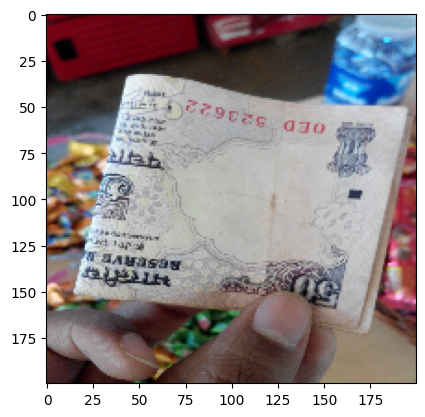

1/1 [==============================] - 0s 141ms/step
No


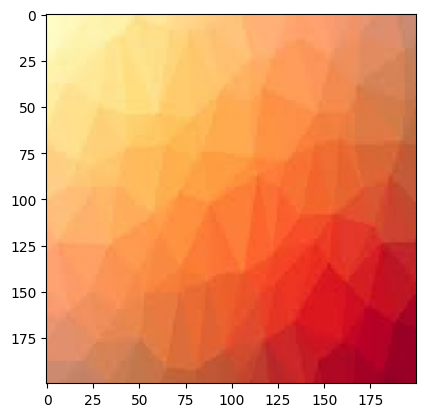

1/1 [==============================] - 0s 61ms/step
No


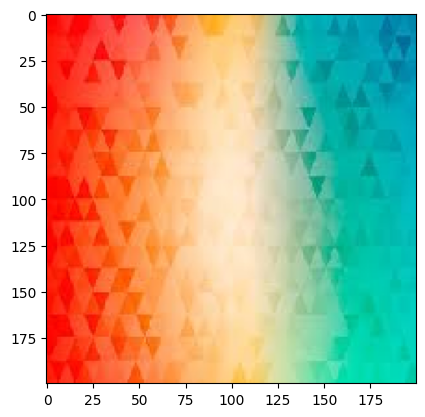

1/1 [==============================] - 0s 65ms/step
No


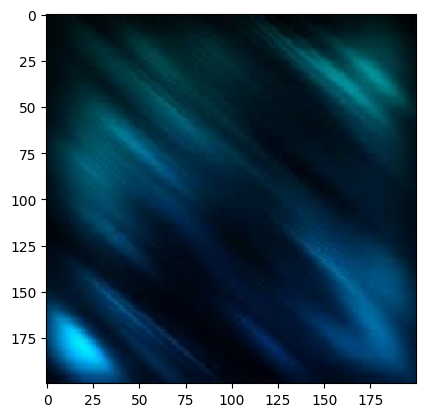

1/1 [==============================] - 0s 75ms/step
No


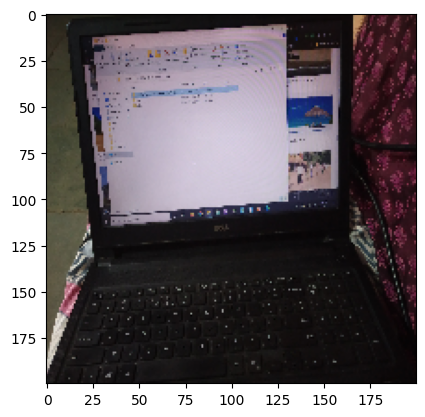

1/1 [==============================] - 0s 72ms/step
No


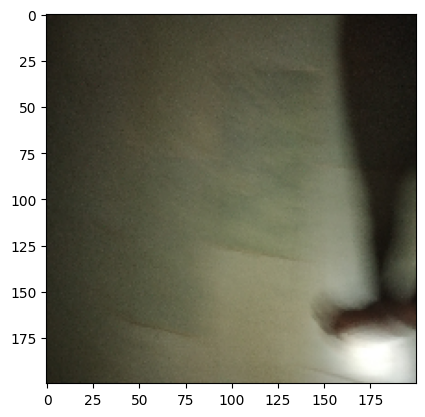

1/1 [==============================] - 0s 65ms/step
No


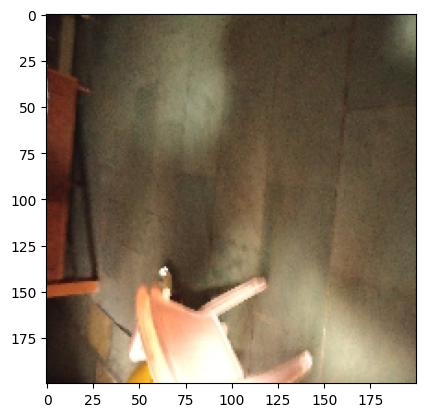

1/1 [==============================] - 0s 59ms/step
No


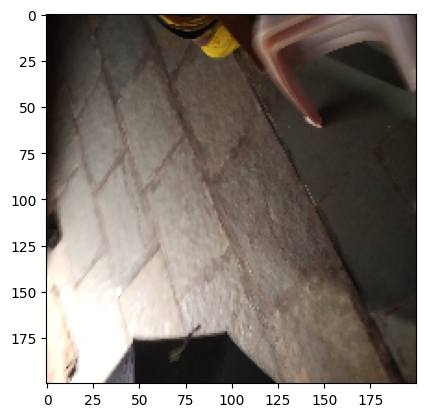

1/1 [==============================] - 0s 73ms/step
No


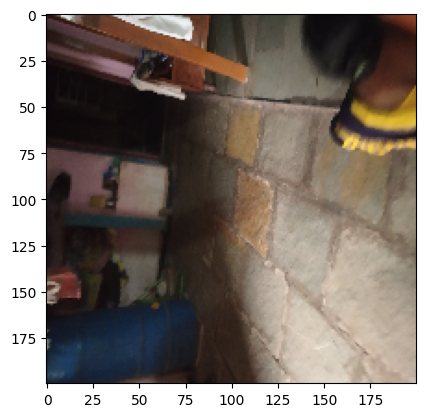

1/1 [==============================] - 0s 70ms/step
No


In [ ]:
dir_path='test'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==1:
        print("Yes")
    else:
        print("No")